# Create Multiple households load profile

Power converted to kW

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

current_folder = 'drive/My Drive/DAI-Labor/RL_VPP_Thesis/data/'

input_folder = current_folder + 'households_inputs_fromR_Blem/'
output_folder = current_folder + 'scenario_datasets/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import math

In [ ]:
household_data1 = pd.read_csv(input_folder + 'consumer-00000003_glimpse_TEST_year.csv')
household_data2 = pd.read_csv(input_folder + 'consumer-00000004_glimpse_TEST_year.csv')
household_data3 = pd.read_csv(input_folder + 'consumer-00000005_glimpse_TEST_year.csv')

household_data1['time'] = pd.to_datetime(household_data1['time'])
household_data2['time'] = pd.to_datetime(household_data2['time'])
household_data3['time'] = pd.to_datetime(household_data3['time'])
#household_data['time'] = pd.to_datetime(household_data['time'], unit='ms')
household_data3.head()
household_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175201 entries, 0 to 175200
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  175201 non-null  int64         
 1   time        175201 non-null  datetime64[ns]
 2   energy      175201 non-null  float64       
 3   power       175201 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 5.3 MB


In [ ]:
household_data1 = household_data1.drop(['energy'], axis=1)
household_data2 = household_data2.drop(['energy'], axis=1)
household_data3 = household_data3.drop(['energy'], axis=1)
household_data3.tail()

,Unnamed: 0,time,power
175196,175197,2017-12-31 23:48:00,970843
175197,175198,2017-12-31 23:51:00,1022088
175198,175199,2017-12-31 23:54:00,961033
175199,175200,2017-12-31 23:57:00,1240380
175200,175201,2018-01-01 00:00:00,1022315


In [ ]:
#household_data['time'].resample("D").agg(["sum", "count"])
#household_data.groupby(pd.TimeGrouper('15min'))[0].ohlc()

time_sampled1 = household_data1.resample('15min', on='time').time.sum
time_sampled2 = household_data2.resample('15min', on='time').time.sum
time_sampled3 = household_data3.resample('15min', on='time').time.sum

household_data1 = household_data1.resample('15min', on='time').agg({'time':'min', 'power':'mean'})
household_data2 = household_data2.resample('15min', on='time').agg({'time':'min', 'power':'mean'})
household_data3 = household_data3.resample('15min', on='time').agg({'time':'min', 'power':'mean'})

household_data1 = household_data1.drop(['time'], axis=1)
household_data2 = household_data2.drop(['time'], axis=1)
household_data3 = household_data3.drop(['time'], axis=1)

household_data1 = household_data1.loc['2017-01-01 00:00:00':'2018-01-01 00:00:00']
household_data2 = household_data2.loc['2017-01-01 00:00:00':'2018-01-01 00:00:00']
household_data3 = household_data3.loc['2017-01-01 00:00:00':'2018-01-01 00:00:00']

household_data1[household_data1["power"]==""] = np.NaN
household_data2[household_data2["power"]==""] = np.NaN
household_data3[household_data3["power"]==""] = np.NaN

household_data1.power = household_data1.power.ffill()
household_data2.power = household_data2.power.ffill()
household_data3.power = household_data3.power.ffill()

#Convertion from mW to kW
household_data1['power'] = household_data1['power']/1000000
household_data2['power'] = household_data2['power']/1000000
household_data3['power'] = household_data3['power']/1000000

""" household_data1['energy'] = household_data1['energy']/1000000
household_data2['energy'] = household_data2['energy']/1000000 """

household_data3.info()
#print(time_sampled)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   35041 non-null  float64
dtypes: float64(1)
memory usage: 547.5 KB


In [ ]:
household_data3.tail()

,power
time,
2017-12-31 23:00:00,2.678600
2017-12-31 23:15:00,1.287489
2017-12-31 23:30:00,0.910381
2017-12-31 23:45:00,1.021040
2018-01-01 00:00:00,1.022315


In [ ]:
""" household_data1 = household_data1.fillna(method='ffill', inplace=True)
household_data2 = household_data2.fillna(method='ffill', inplace=True) """
household_data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   35041 non-null  float64
dtypes: float64(1)
memory usage: 547.5 KB


In [ ]:
household_data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   35041 non-null  float64
dtypes: float64(1)
memory usage: 547.5 KB


In [ ]:
# Splitting dataframe by row index

#household_data = household_data.iloc[:1000,:]
#df_2 = df.iloc[1000:,:]
#print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))


household_data3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   35041 non-null  float64
dtypes: float64(1)
memory usage: 547.5 KB


In [ ]:
household_data = household_data1
household_data['power'] = household_data1['power'] + household_data2['power'] + household_data3['power']
household_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   35041 non-null  float64
dtypes: float64(1)
memory usage: 547.5 KB


In [ ]:
household_csv = household_data.to_csv(output_folder + 'household_load_test_year_15.csv', index = True)

In [ ]:
#household_data = household_data.iloc[:,:1]

#household_data = household_data.drop(['time'], axis=1)
#df_2 = df.iloc[1000:,:]
#print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))
household_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2017-01-01 00:00:00 to 2018-01-01 00:00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   power   35041 non-null  float64
dtypes: float64(1)
memory usage: 547.5 KB


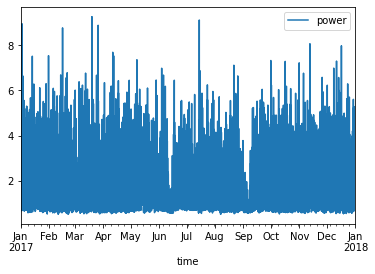

In [ ]:
household_data.plot()
#household_data.plot(legend=None)
#plt.show()